In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train_data = pd.read_csv('train.csv', header=None, names=['ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job', 'State', 'Party', 'Barely True Counts', 'False Counts', 'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts', 'Context'])

In [14]:
train_data.head(10)

,ID,Label,Statement,Subject,Speaker,Job,State,Party,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10240 non-null  object 
 1   Label                 10240 non-null  object 
 2   Statement             10240 non-null  object 
 3   Subject               10238 non-null  object 
 4   Speaker               10238 non-null  object 
 5   Job                   7342 non-null   object 
 6   State                 8030 non-null   object 
 7   Party                 10238 non-null  object 
 8   Barely True Counts    10238 non-null  float64
 9   False Counts          10238 non-null  float64
 10  Half True Counts      10238 non-null  float64
 11  Mostly True Counts    10238 non-null  float64
 12  Pants on Fire Counts  10238 non-null  float64
 13  Context               10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [16]:
train_data.shape

(10240, 14)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data['Statement'], train_data['Label'], test_size=0.2, random_state=42)

In [20]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [21]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [22]:
# Initialize PassiveAggressiveClassifier
pac_classifier = PassiveAggressiveClassifier(max_iter=50)

In [23]:
# Fit the model
pac_classifier.fit(X_train_tfidf, y_train)

C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [25]:
# Make predictions
y_pred = pac_classifier.predict(X_test_tfidf)

In [26]:
# Step 3: Create a confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 96  55  57  74  82  37]
 [ 56  56  45  75  91  17]
 [ 60  44  60  80  72  23]
 [ 93  66  63 114  78  24]
 [ 67  59  61  85  95  15]
 [ 33  22  29  19  22  23]]


In [30]:
# Step 4: Measure the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

21.6796875

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pac_classifier, X_train_tfidf, y_train, cv=5)

C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\ppbar\anaconda3\Lib\site-packages\sklearn\linear_mo

In [33]:
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())

Cross-Validation Scores: [0.21720561 0.20988408 0.20512821 0.21794872 0.20879121]
Mean Accuracy:  0.21179156414055744


In [34]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

       FALSE       0.24      0.24      0.24       401
        TRUE       0.19      0.16      0.17       340
 barely-true       0.19      0.18      0.18       339
   half-true       0.26      0.26      0.26       438
 mostly-true       0.22      0.25      0.23       382
  pants-fire       0.17      0.16      0.16       148

    accuracy                           0.22      2048
   macro avg       0.21      0.21      0.21      2048
weighted avg       0.22      0.22      0.22      2048



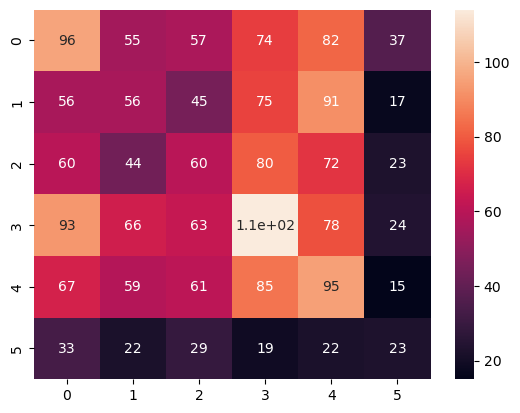

In [36]:
#Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [37]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, class_weight='balanced')

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Replace PassiveAggressiveClassifier with RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_tfidf, y_train)

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
important_features = pd.DataFrame(data={'Feature': feature_names, 'Importance': feature_importances})
important_features = important_features.sort_values(by='Importance', ascending=False)
print(important_features.head(10))

       Feature  Importance
8529      says    0.009472
7142   percent    0.005109
9196     state    0.004536
6674     obama    0.004414
9572       tax    0.003907
7138    people    0.003835
10674     year    0.003802
10675    years    0.003773
1          000    0.003713
9202    states    0.003595
